# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
os.chdir('/content/drive/MyDrive/2023-Elovikova-TimeSeriesCourse/practice/05 Snippets')

In [5]:
!pip install stumpy

In [6]:
#!pip install matrixprofile

In [7]:
#!pip install matrixprofile forces protobuf==3.11.2

In [8]:
#import matrixprofile

Импорт библиотек и модулей

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal

In [10]:
from stumpy import snippets

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

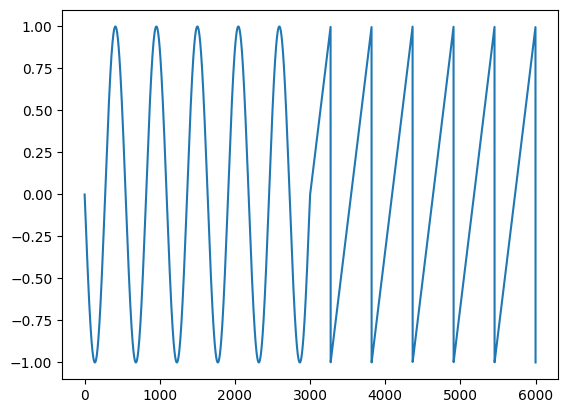

In [11]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [12]:
#Поиск сниппетов
snp = snippets(ts, 600, 2)

600


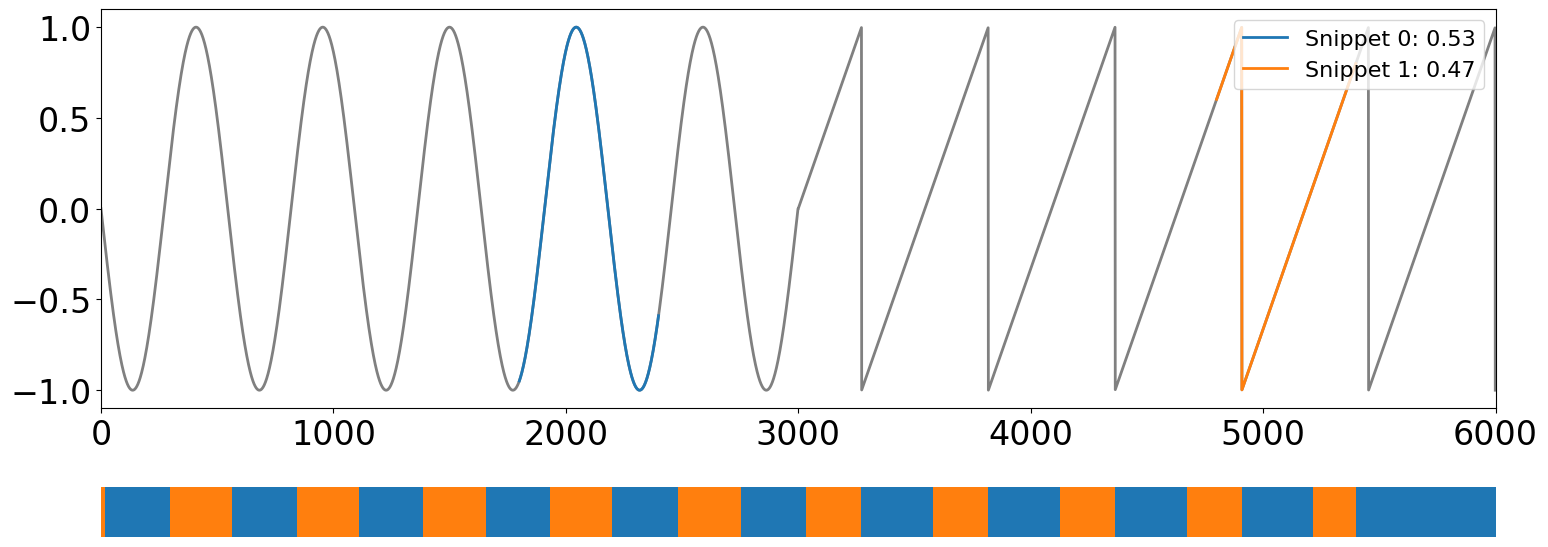

<Axes: >

In [13]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «X» (угол крена) на временном интервале от 950 сек. до 109 сек.** из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из модуля snippets.py.

In [14]:
# INSERT YOUR CODE
import pandas as pd
pamap = pd.read_csv("/content/drive/MyDrive/2023-Elovikova-TimeSeriesCourse/practice/05 Snippets/datasets/PAMAP/PAMAP.txt", sep=' ', header=None).T


In [15]:
pamap.transpose().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,505.71,2.0,NaN,35.0625,0.497271,9.08249,-1.875540,0.319610,9.10631,-1.642520,-0.064955,0.033557,0.051343,2.52139,-23.9094,3.66977,0.636708,-0.766698,0.073248,0.037565
1,505.72,2.0,NaN,35.0625,0.693164,8.93258,-1.677900,0.379878,8.90965,-1.416770,0.063998,0.052043,0.078401,2.12795,-23.8953,4.08997,0.636387,-0.766974,0.073379,0.037113
2,505.73,2.0,79.0,35.0625,0.929013,9.04638,-1.441670,0.606483,8.89380,-1.236830,0.192540,0.034474,0.070010,1.87388,-24.2730,4.23135,0.635648,-0.767586,0.073587,0.036706
3,505.74,2.0,NaN,35.0625,1.039680,9.38386,-1.595650,0.772609,8.99907,-1.237530,0.282665,0.053817,0.057465,1.73597,-23.3649,3.94322,0.635121,-0.768060,0.073553,0.035983
4,505.75,2.0,NaN,35.0625,1.070930,9.38219,-1.827400,0.938327,9.21025,-1.419260,0.335187,0.016476,0.011713,2.25530,-24.4165,4.65783,0.633378,-0.769606,0.072906,0.034988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145995,2305.66,4.0,NaN,35.6875,2.140840,7.09274,-0.213018,2.107840,7.31908,-0.041456,0.256645,-0.568124,0.005918,-12.27830,-50.9797,20.50000,0.566790,-0.673692,-0.347012,-0.323220
145996,2305.67,4.0,NaN,35.6875,2.027390,6.56647,-0.135921,2.015190,6.94196,-0.041992,0.221546,-0.501649,0.103945,-12.52640,-51.7445,20.64360,0.566736,-0.675315,-0.345593,-0.321443
145997,2305.68,4.0,NaN,35.6875,1.978930,6.11268,-0.445092,1.861420,6.39894,-0.027528,0.162119,-0.355711,0.133332,-11.76720,-51.6443,21.35340,0.566580,-0.676581,-0.344391,-0.320344
145998,2305.69,4.0,NaN,35.6875,1.677590,5.73813,-0.294450,1.707950,5.96165,-0.073210,0.122680,-0.262807,0.188172,-12.41520,-51.3625,21.34730,0.566308,-0.677672,-0.343209,-0.319786


In [16]:
start = 800
end = 950

ts = pamap.loc[start < pamap.iloc[:, 0]].loc[pamap.iloc[:, 0] < end].iloc[:, 10].to_numpy()
print(len(ts))
snp = snippets(ts, 600, 4, percentage=0.5)

14999


Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

600


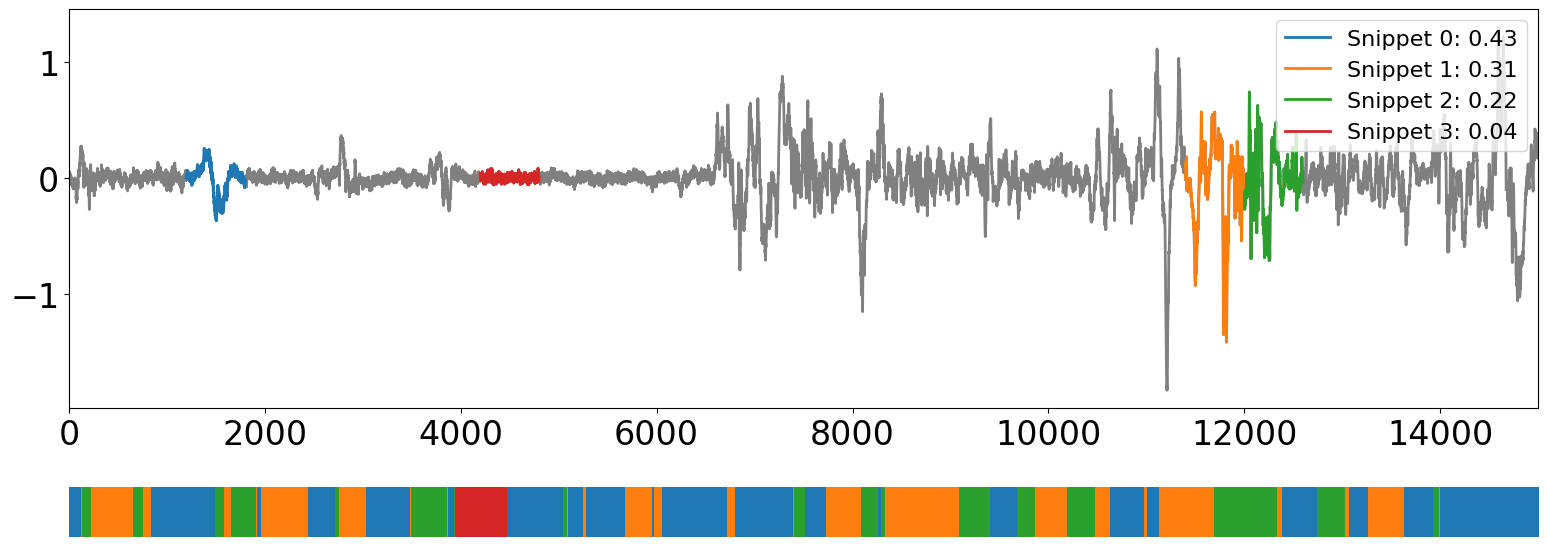

<Axes: >

In [17]:
# INSERT YOUR CODE
plot_snippets(ts, snp)

Оцените точность разметки, полученной при помощи сниппетов.

In [18]:
!apt install sklearn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package sklearn


In [19]:
ts


array([-0.0205366 , -0.00773725, -0.0179796 , ...,  0.168259  ,
        0.227627  ,  0.248037  ])

In [20]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
pamap= pamap.dropna()# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(pamap, pamap, test_size=0.2, random_state=42)

# Преобразование данных в числовые признаки с помощью метода PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Обучение модели классификации на обучающей выборке
clf = RandomForestClassifier()
clf.fit(X_train_pca, y_train)

# Предсказание меток классов на тестовой выборке
y_pred = clf.predict(X_test_pca)

# Заполнение массива y_train предсказанными метками классов
y_train = y_train.reshape(-1, 1)
y_train = np.concatenate([y_train, y_pred], axis=1)

# Вывод предсказанных меток классов
print(y_train)

ValueError: ignored

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
#from stampy import find_snippets

# Определить данные для оценки
# ...

# Определить размер окна для сниппетов
window_size = 20

# Использовать функцию find_snippets для определения сниппетов
snp = snippets(ts,
    20,
    5,
    percentage=1.0,
    s=None,
    mpdist_percentage=0.05,
    mpdist_k=None,
    normalize=True,
    p=2.0,
    mpdist_T_subseq_isconstant=None)

# Вычисление предсказанных меток классов для каждого сниппета
labels_pred = np.zeros((len(snp), 1))
for i, snippet in enumerate(snp):
    neighbors = np.array(list(snippet.flatten()))
    for neighbor_index in neighbors:
        labels_pred[neighbor_index] = y_train[start_time + i * window_size]

# Вычисление истинных меток классов для всех данных
labels = np.where(df.iloc[:, 0] < end_time, 1, 0)
labels = np.where(labels == 3, 1, labels)
labels = np.where(labels == 17, 0, labels)

# Оценка точности разметки с использованием предсказанных меток классов
accuracy_score(labels, labels_pred)

In [ ]:
#!pip install matrixprofile

In [ ]:
#!pip install -U kaleido

In [ ]:
"""import pandas as pd

df = pd.read_csv(r'/content/drive/MyDrive/2023-Elovikova-TimeSeriesCourse/practice/05 Snippets/datasets/PAMAP/PAMAP.txt', sep=' ', header=None).T
start_time = 850
end_time = 880

ts = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 10].to_numpy()
snp = snippets(ts, 500, 2)
"""

In [ ]:
#snippet["neighbors"]

In [ ]:
'''# INSERT YOUR CODE
from sklearn.metrics import accuracy_score

# get predicted labels (from plot_snippets)
labels_pred = np.zeros_like(ts)
for i, snippet in enumerate(snp):
    neighbors = np.array(snippet["neighbors"])
    for neighbor_index in neighbors:
        labels_pred[neighbor_index] = i

# get true labels
labels = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 1].to_numpy()
labels = np.where(labels == 3, 1, labels)
labels = np.where(labels == 17, 0, labels)

accuracy_score(labels, labels_pred)'''

In [ ]:
# Получение данных об активности за нужный промежуток
start = 1000
stop = 1930
labels = pamap.loc[:,start < pamap.iloc[0,:]].loc[:,stop > pamap.iloc[0,:]].iloc[1,:].to_numpy()
labels

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1.

In [ ]:
# INSERT YOUR CODE

Оцените точность разметки, полученной при помощи сниппетов.

In [ ]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [ ]:
# INSERT YOUR CODE

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

In [ ]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?